# Craft Text Detector
craft-text-detector 0.3.1

In [1]:
# import Craft class
from craft_text_detector import Craft
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

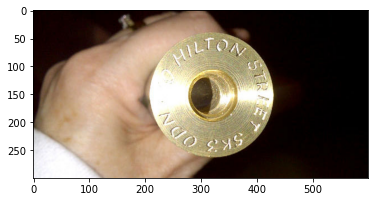

In [31]:
# set path to image and export folder directory
image_path = './Web Images/C-1.jpg'
output_dir = './Web Images/Craft Output/'
image = mpimg.imread(image_path)
plt.imshow(image)

In [33]:
# create a craft instance
craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)

In [34]:
# apply craft text detection and export detected regions to output directory
prediction_result = craft.detect_text(image_path)

In [35]:
# unload models from ram/gpu
craft.unload_craftnet_model()
craft.unload_refinenet_model()

In [36]:
import pytesseract

 

ELON mega | a

(28, 292, 3)


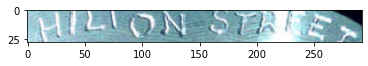

In [37]:
# The text regions can be found in _crops folder.  Using one of the image.
crop_image_path = output_dir + '/C-1_crops/crop_0.png'
crop_image = mpimg.imread(crop_image_path)
plt.imshow(crop_image)
# print(pytesseract.image_to_string(Image.open(crop_image)))
print(pytesseract.image_to_string(crop_image_path))
print(crop_image.shape)

## Pass the image through edge detection and dilation to see if we can get better result from tesseract

In [38]:
import cv2
import numpy as np

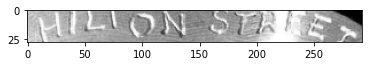

In [39]:
cv2_gray = cv2.imread(crop_image_path)
gray = cv2.cvtColor(cv2_gray, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray')

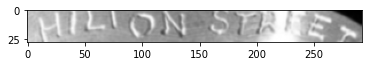

In [45]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blur, 'gray')

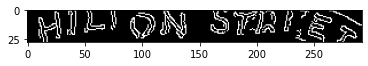

In [47]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
#grayCopy = np.uint8(gray)
# edged = cv2.Canny(gray, 180,80) note 180,80 and not 0,255.  
edged = cv2.Canny(blur,180,80)
plt.imshow(edged, 'gray')

In [48]:
#
print(pytesseract.image_to_string(edged))
print(crop_image.shape)

tee
ON SERENES
rae

(28, 292, 3)


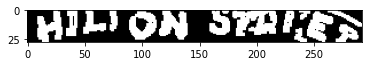

In [49]:
dilate = cv2.dilate(edged, None, iterations=1)
plt.imshow(dilate, 'gray')

In [50]:
print(pytesseract.image_to_string(dilate))
print(crop_image.shape)

Ree mee yo 8 ie oe

(28, 292, 3)
